In [26]:
sam <- list('rep1','rep2','wt1','wt2')

In [27]:
file <- paste(rep('./',4),sam,rep('/',4),sam,rep('-boundsize.txt',4),sep='')

In [32]:
size <<- NULL
for (i in c(1:length(file))){
    s <- read.csv(file[i],sep='\t',skip=1,header=F,stringsAsFactors=F)[,4]
    tmp <- cbind(sam[i],s)
    size <- rbind(size,tmp)
}

In [9]:
library(ggplot2)
library(data.table)
require(ggsci)
require(gridExtra)

Loading required package: ggsci
Loading required package: gridExtra


In [15]:
ggplot()+theme_bw()+scale_color_nejm()+scale_fill_nejm()

ERROR: Error in scale_color_nejm(): could not find function "scale_color_nejm"


In [31]:
rm(size)

In [30]:
c(1:length(file))

[1] 1 2 3 4

In [59]:
s <- as.integer(read.csv(file[1],sep='\t',header=F)[,4])
sample <- c(rep(sam[1],length(s)))
tmp <- cbind(sample=sample,size=list(s))

In [12]:
?row.names


In [93]:
size$size<-as.integer(size$size)

In [33]:
size$V1<-as.factor(as.character(size$V1))
size$s <- as.integer(as.character(size$s))

In [35]:
summary(size)

   Length Class  Mode     
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
   1      -none- character
 

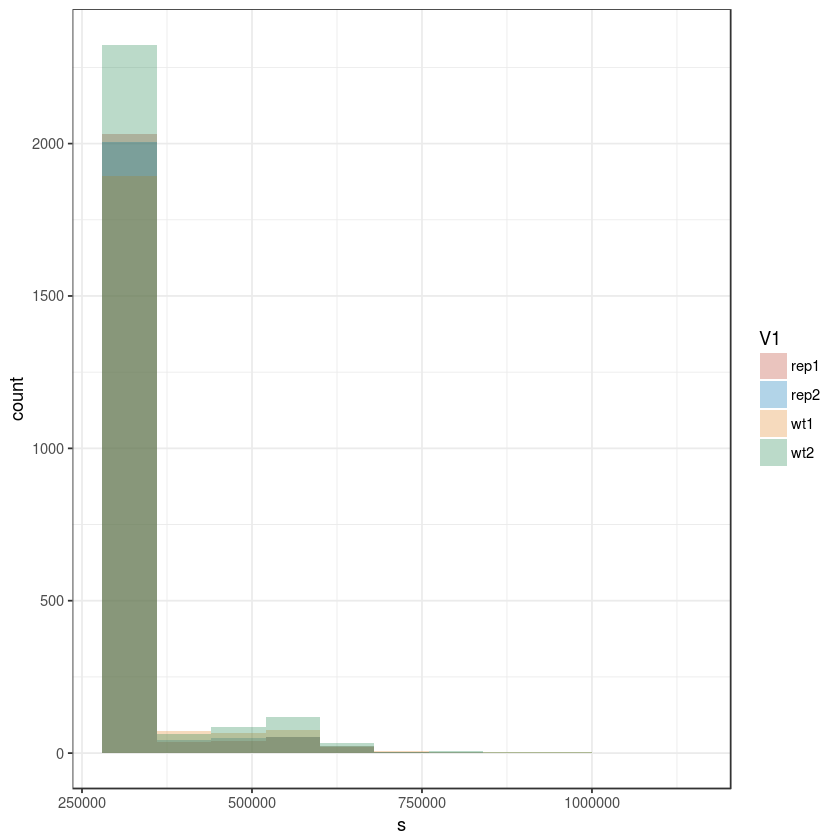

In [31]:
ggplot(size)+geom_histogram(aes(x=s,fill=V1,group=V1),binwidth=80000,position='identity',alpha=0.3)+theme_bw()+scale_color_nejm()+scale_fill_nejm()

In [15]:
rep1 <- read.csv('./rep1/rep1-Insulation.txt',skip=1,header=F,sep='\t',stringsAsFactors=F)[,3]
rep2 <- read.csv('./rep2/rep2-Insulation.txt',skip=1,header=F,sep='\t',stringsAsFactors=F)[,3]
wt1 <- read.csv('./wt1/wt1-Insulation.txt',skip=1,header=F,sep='\t',stringsAsFactors=F)[,3]
wt2 <- read.csv('./wt2/wt2-Insulation.txt',skip=1,header=F,sep='\t',stringsAsFactors=F)[,3]
ren <- read.csv('./ren/ren-Insulation.txt',skip=1,header=F,sep='\t',stringsAsFactors=F)[,3]

In [16]:
insulation <- cbind(rep1,rep2,wt1,wt2,ren)
length(rep1)
length(rep2)
length(wt1)
length(wt2)

[1] 61199

[1] 61199

[1] 61199

[1] 61199

In [17]:
insulation<-data.frame(insulation)

In [18]:
insulation$rep1<-as.numeric(as.character(insulation$rep1))
insulation$rep2<-as.numeric(as.character(insulation$rep2))
insulation$wt1<-as.numeric(as.character(insulation$wt1))
insulation$wt2<-as.numeric(as.character(insulation$wt2))
insulation$ren<-as.numeric(as.character(insulation$ren))

In [19]:
m<- cor(insulation)
m

,rep1,rep2,wt1,wt2,ren
rep1,1.0000000,0.9762622,0.9319733,0.4259501,0.9657416
rep2,0.9762622,1.0000000,0.8999098,0.5238422,0.9217639
wt1,0.9319733,0.8999098,1.0000000,0.4477136,0.9159647
wt2,0.4259501,0.5238422,0.4477136,1.0000000,0.3056363
ren,0.9657416,0.9217639,0.9159647,0.3056363,1.0000000


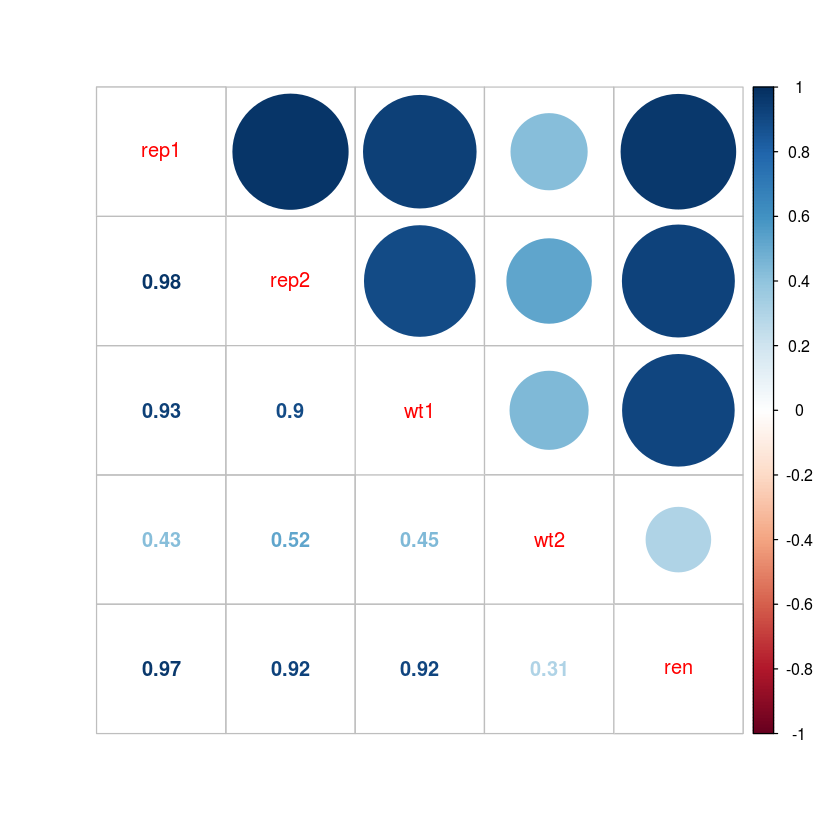

In [20]:
corrplot.mixed(m)

In [12]:
library(corrplot)

corrplot 0.84 loaded


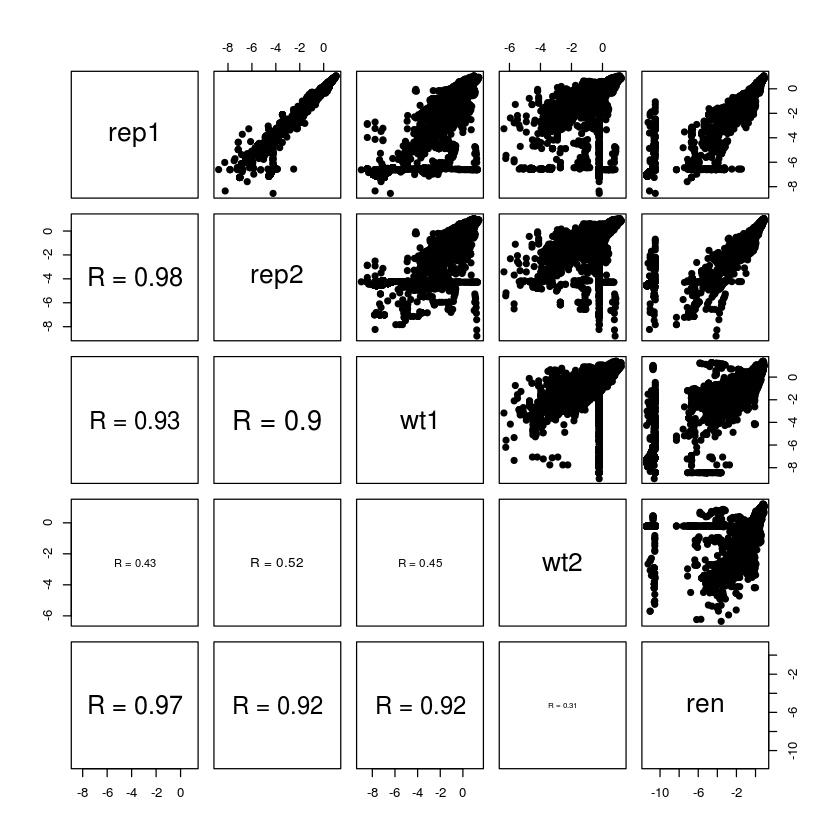

In [25]:
# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 19)
}
# Create the plots
pairs(insulation[,1:5], 
      lower.panel = panel.cor,
      upper.panel = upper.panel)

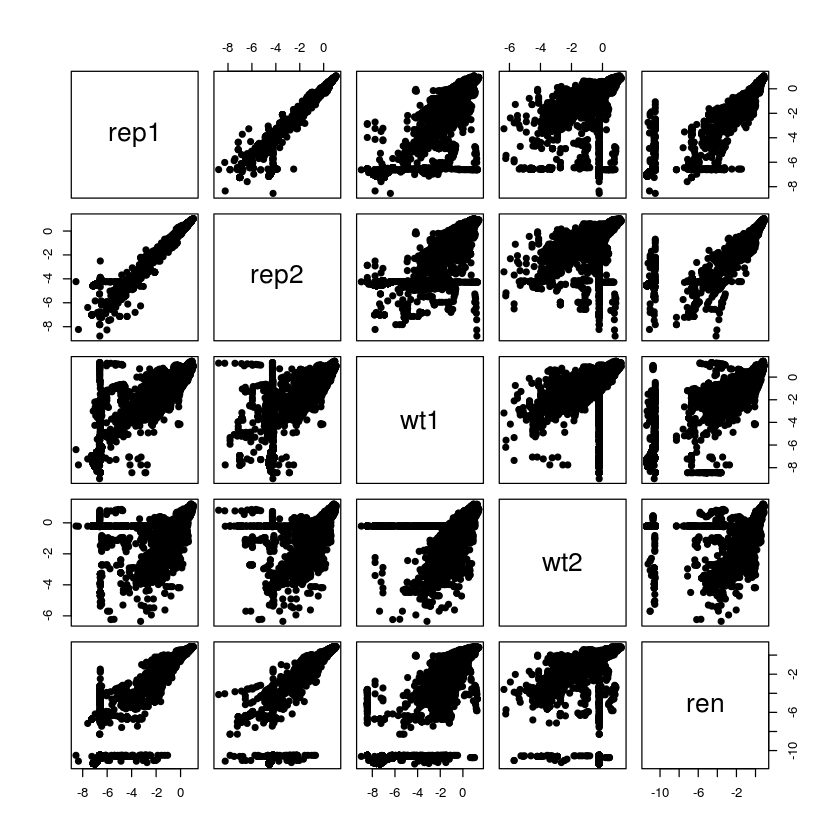

In [22]:
pairs(insulation[,1:5],pch=19)